In [7]:
alpha = 0.05
biased_str_fromer_lgd = bias_fromer_lgd[(bias_fromer_lgd["FDR"]< alpha) & (bias_fromer_lgd["Bias"]>0.5)]
biased_str_howrigan_rec_lgd = bias_howrigan_rec_lgd[(bias_howrigan_rec_lgd["FDR"]< alpha) & (bias_howrigan_rec_lgd["Bias"]>0.5)]
biased_str_howrigan_lgd = bias_howrigan_lgd[(bias_howrigan_lgd["FDR"]< alpha) & (bias_howrigan_lgd["Bias"]>0.5)]
biased_str_howrigan_rec = bias_howrigan_rec[(bias_howrigan_rec["FDR"]< alpha) & (bias_howrigan_rec["Bias"]>0.5)]
biased_str_gwas_psyencode = bias_psyencode_gwas[(bias_psyencode_gwas["FDR"]< alpha) & (bias_psyencode_gwas["Bias"]>0.5)]
biased_str_gwas_magma = bias_magma_gwas[(bias_magma_gwas["FDR"]< alpha) & (bias_magma_gwas["Bias"]>0.5)]
print(biased_str_fromer_lgd.shape[0])
print(biased_str_howrigan_rec_lgd.shape[0])
print(biased_str_howrigan_lgd.shape[0])
print(biased_str_howrigan_rec.shape[0])
print(biased_str_gwas_psyencode.shape[0])
print(biased_str_gwas_magma.shape[0])

1
4
0
0
4
4


In [26]:
biased_str_gwas_psyencode

,STR,Bias,T-stat,P,FDR
1,Primary_somatosensory_area_upper_limb,0.568088,3.785326,0.000192,0.038817
2,Primary_somatosensory_area_lower_limb,0.565762,3.489154,0.000572,0.038817
3,Primary_motor_area,0.564164,3.420865,0.000729,0.038817
4,Primary_visual_area,0.563308,3.470995,0.000611,0.038817


In [27]:
bias_asd_ssc = pd.read_csv("dat/bias/asd.ssc.qavg.rank.tsv")
bias_asd_spark = pd.read_csv("dat/bias/asd.spark.qavg.rank.tsv")
bias_asd_tada = pd.read_csv("dat/bias/asd.tada.qavg.rank.tsv")
bias_asd_sib = pd.read_csv("dat/bias/asd.sib.qavg.rank.tsv")
bias_asd_sib_lgd = pd.read_csv("dat/bias/asd.sib_lgd.qavg.rank.tsv")
bias_scz_gwas = pd.read_csv("dat/bias/scz.psyencode.qavg.rank.tsv", delimiter="\t")

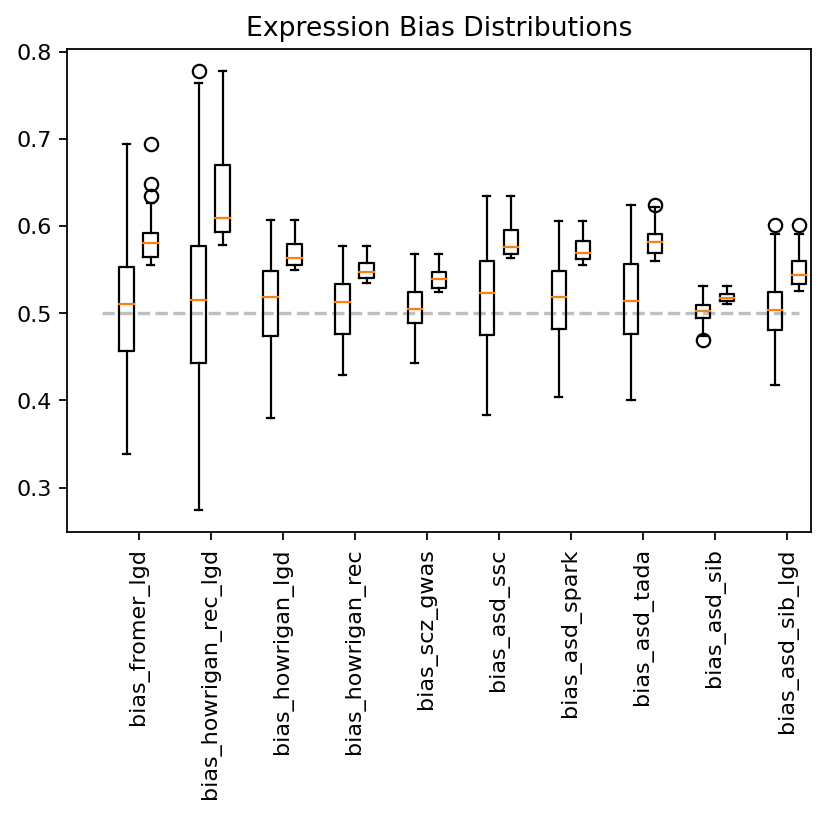

In [28]:
plt.figure(dpi=160)
ax = plt.axes()
num = -1
names = []
sticks = []
for i, (name, bias) in enumerate(zip(["bias_fromer_lgd", "bias_howrigan_rec_lgd", "bias_howrigan_lgd", "bias_howrigan_rec"], 
                                     [bias_fromer_lgd, bias_howrigan_rec_lgd, bias_howrigan_lgd, bias_howrigan_rec])):
    num += 3
    names.append(name)
    All = bias["Bias"].values
    top50 = bias.head(50)["Bias"].values
    bp = plt.boxplot([All, top50], positions = [num, num+1], widths = 0.6)
    sticks.append(num + 0.5)
for i, (name, bias) in enumerate(zip(["bias_scz_gwas", "bias_asd_ssc", "bias_asd_spark", "bias_asd_tada", "bias_asd_sib", "bias_asd_sib_lgd"], 
                                     [bias_scz_gwas, bias_asd_ssc, bias_asd_spark, bias_asd_tada, bias_asd_sib, bias_asd_sib_lgd])):
    num += 3
    names.append(name)
    All = bias["Bias"].values
    top50 = bias.head(50)["Bias"].values
    bp = plt.boxplot([All, top50], positions = [num, num+1], widths = 0.6)
    sticks.append(num + 0.5)
ax.set_xticklabels(names)
ax.set_xticks(sticks)
plt.xticks(rotation=90) 
plt.hlines(y=0.5, xmin=1, xmax = num+1, linestyles="dashed", alpha=0.5, color="grey")
#plt.legend()
plt.title("Expression Bias Distributions")
plt.show()

28

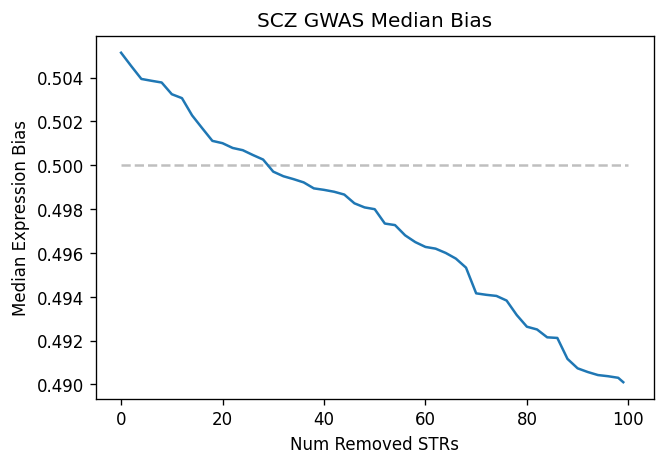

In [29]:
QuntileAVGSelectN(bias_scz_gwas, "SCZ GWAS", True)

27

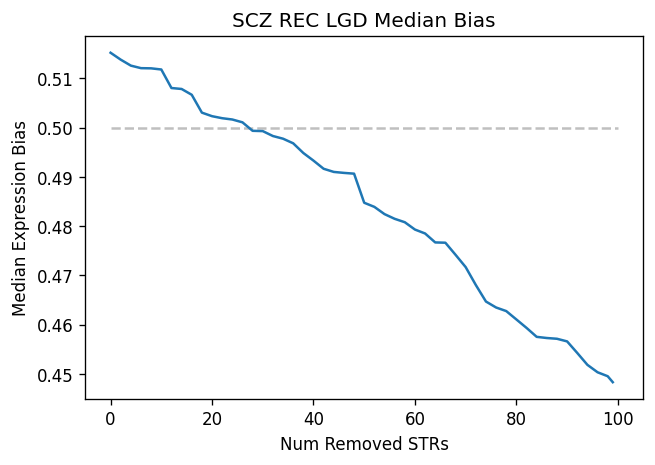

In [30]:
QuntileAVGSelectN(bias_howrigan_rec_lgd, "SCZ REC LGD", True)

65

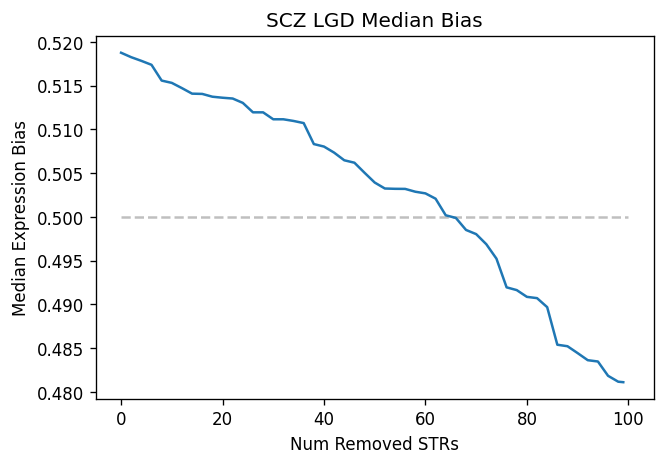

In [31]:
QuntileAVGSelectN(bias_howrigan_lgd, "SCZ LGD", True)

In [32]:
brianspan = loadgenelist("../dat/genes/brainspan_express.txt")

In [33]:
rand_dfs = []
median_biases = []
top50_median_biases = []
for i in range(100):
    rand = np.random.choice(brianspan, 61)
    df = QuantileAVGScoring(ExpZscoreMat, rand)
    median = np.median(df["Bias"].values)
    top50_median = np.median(df.head(50)["Bias"].values)
    median_biases.append(median)
    top50_median_biases.append(top50_median)
    rand_dfs.append(df)

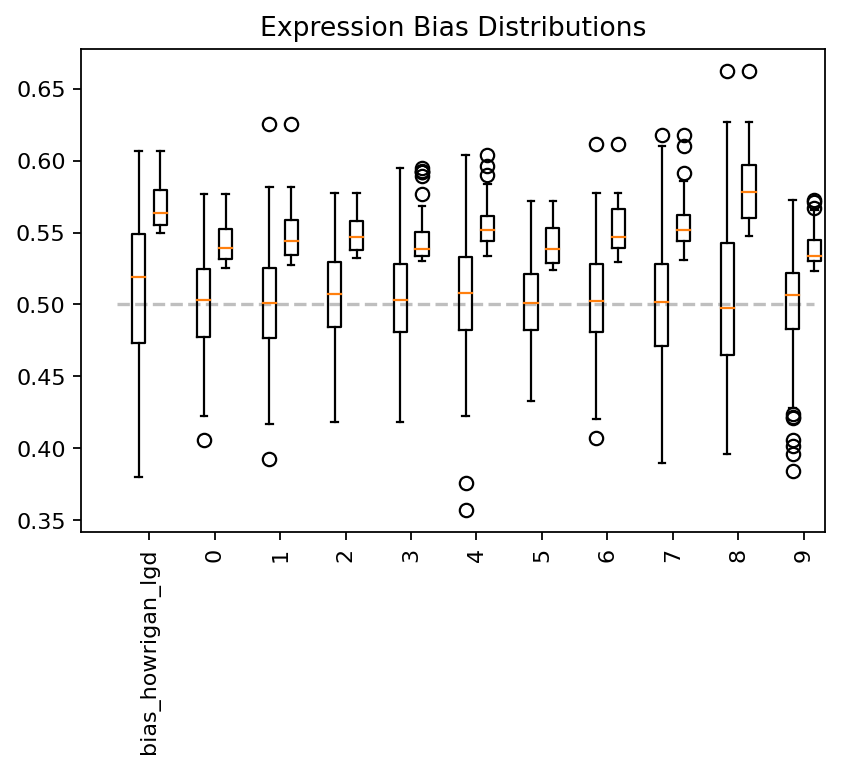

In [34]:
plt.figure(dpi=160)
ax = plt.axes()
num = -1
names = []
sticks = []
for i, (name, bias) in enumerate(zip(["bias_howrigan_lgd"], 
                                     [bias_howrigan_lgd])):
    num += 3
    names.append(name)
    All = bias["Bias"].values
    top50 = bias.head(50)["Bias"].values
    bp = plt.boxplot([All, top50], positions = [num, num+1], widths = 0.6)
    sticks.append(num + 0.5)
for i, (name, bias) in enumerate(zip([str(i) for i in range(10)], rand_dfs[:10])):
    num += 3
    names.append(name)
    All = bias["Bias"].values
    top50 = bias.head(50)["Bias"].values
    bp = plt.boxplot([All, top50], positions = [num, num+1], widths = 0.6)
    sticks.append(num + 0.5)
ax.set_xticklabels(names)
ax.set_xticks(sticks)
plt.xticks(rotation=90) 
plt.hlines(y=0.5, xmin=1, xmax = num+1, linestyles="dashed", alpha=0.5, color="grey")
#plt.legend()
plt.title("Expression Bias Distributions")
plt.show()

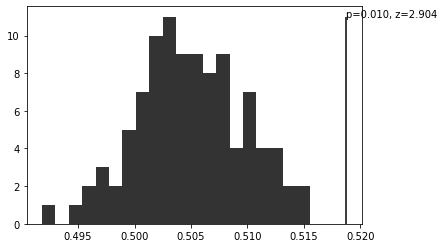

In [35]:
scz_median = np.median(bias_howrigan_lgd["Bias"].values)
scz_top50_median = np.median(bias_howrigan_lgd.head(50)["Bias"].values)
PlotPermutationP(median_biases, scz_median)

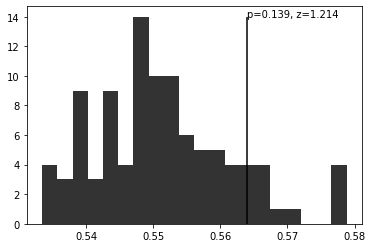

In [36]:
PlotPermutationP(top50_median_biases, scz_top50_median)

In [37]:
sibling_genes = loadgenelist("../dat/genes/asd.sib.entrez.list")

In [38]:
rand_dfs = []
median_biases = []
top50_median_biases = []
for i in range(100):
    rand = np.random.choice(sibling_genes, 61)
    df = QuantileAVGScoring(ExpZscoreMat, rand)
    median = np.median(df["Bias"].values)
    top50_median = np.median(df.head(50)["Bias"].values)
    median_biases.append(median)
    top50_median_biases.append(top50_median)
    rand_dfs.append(df)

/Users/jiayao/Work/ASD_Circuits/src/ASD_Circuits.py:272: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  DZzscore = ZscoreMat[STR].loc[np.array(DZgenes)].values


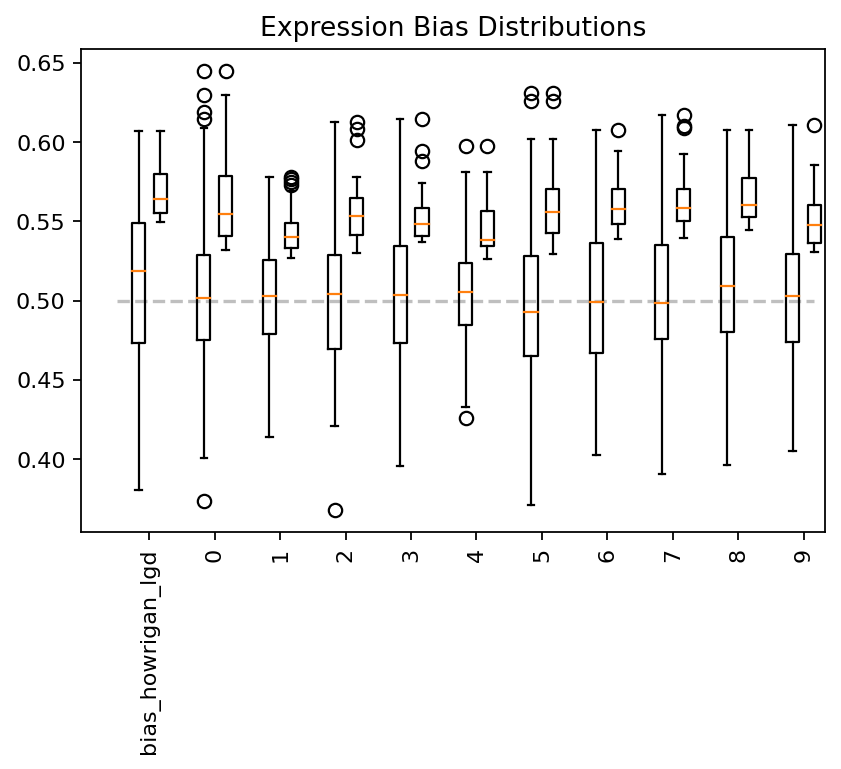

In [39]:
plt.figure(dpi=160)
ax = plt.axes()
num = -1
names = []
sticks = []
for i, (name, bias) in enumerate(zip(["bias_howrigan_lgd"], 
                                     [bias_howrigan_lgd])):
    num += 3
    names.append(name)
    All = bias["Bias"].values
    top50 = bias.head(50)["Bias"].values
    bp = plt.boxplot([All, top50], positions = [num, num+1], widths = 0.6)
    sticks.append(num + 0.5)
for i, (name, bias) in enumerate(zip([str(i) for i in range(10)], rand_dfs[:10])):
    num += 3
    names.append(name)
    All = bias["Bias"].values
    top50 = bias.head(50)["Bias"].values
    bp = plt.boxplot([All, top50], positions = [num, num+1], widths = 0.6)
    sticks.append(num + 0.5)
ax.set_xticklabels(names)
ax.set_xticks(sticks)
plt.xticks(rotation=90) 
plt.hlines(y=0.5, xmin=1, xmax = num+1, linestyles="dashed", alpha=0.5, color="grey")
#plt.legend()
plt.title("Expression Bias Distributions")
plt.show()

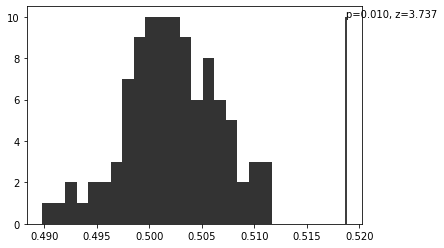

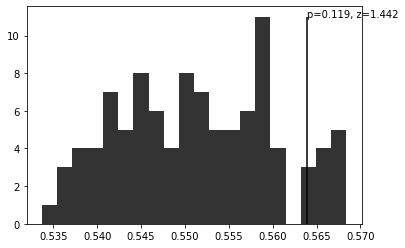

In [40]:
scz_median = np.median(bias_howrigan_lgd["Bias"].values)
scz_top50_median = np.median(bias_howrigan_lgd.head(50)["Bias"].values)
PlotPermutationP(median_biases, scz_median)
PlotPermutationP(top50_median_biases, scz_top50_median)

In [41]:
null_50 = QuantileNull(200, 2130)

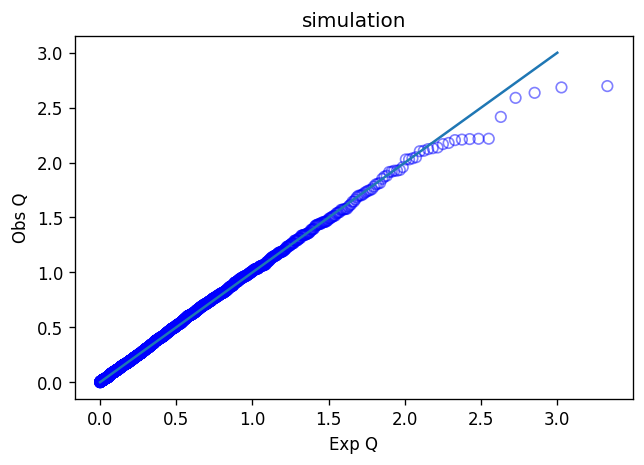

In [42]:
QQplot(null_50["P"].values, "simulation")

In [43]:
brianspan = loadgenelist("../dat/genes/brainspan_express.txt")
rand_dfs = []
median_biases = []
top50_median_biases = []
for i in range(100):
    rand = np.random.choice(brianspan, 231)
    df = QuantileAVGScoring(ExpZscoreMat, rand)
    median = np.median(df["Bias"].values)
    top50_median = np.median(df.head(50)["Bias"].values)
    median_biases.append(median)
    top50_median_biases.append(top50_median)
    rand_dfs.append(df)

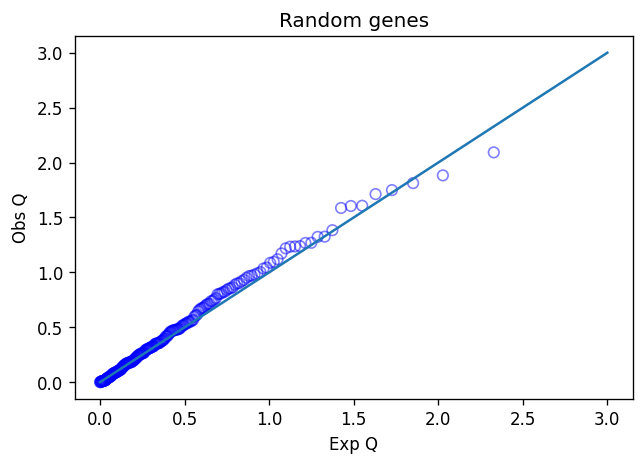

In [44]:
rand = np.random.choice(brianspan, 231)
df = QuantileAVGScoring(ExpZscoreMat, rand)
QQplot(df["P"].values, title="Random genes")

/Users/jiayao/Work/ASD_Circuits/src/ASD_Circuits.py:272: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  DZzscore = ZscoreMat[STR].loc[np.array(DZgenes)].values


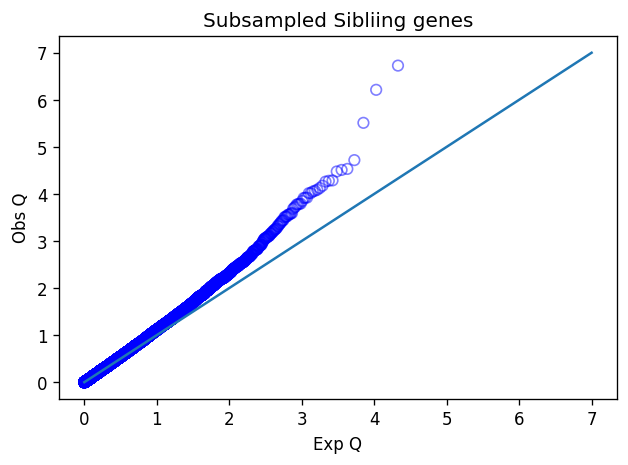

In [45]:
pvalues = []
for i in range(100):
    rand = np.random.choice(sibling_genes, 231)
    df = QuantileAVGScoring(ExpZscoreMat, rand)
    pvalues.extend(df["P"].values)
QQplot(pvalues, title="Subsampled Sibliing genes")

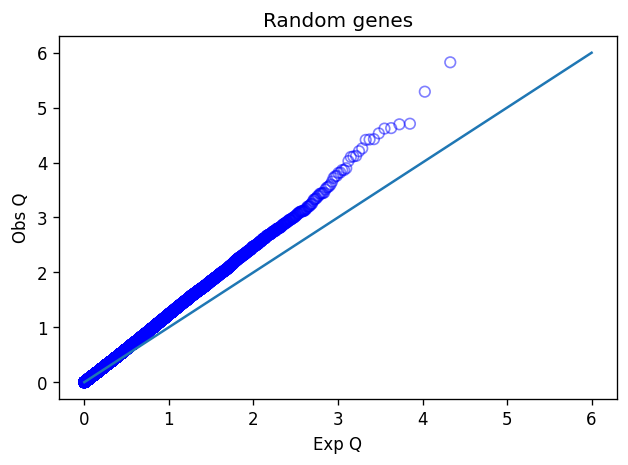

In [46]:
pvalues = []
for i in range(100):
    rand = np.random.choice(brianspan, 231)
    df = QuantileAVGScoring(ExpZscoreMat, rand)
    pvalues.extend(df["P"].values)
QQplot(pvalues, title="Random genes")

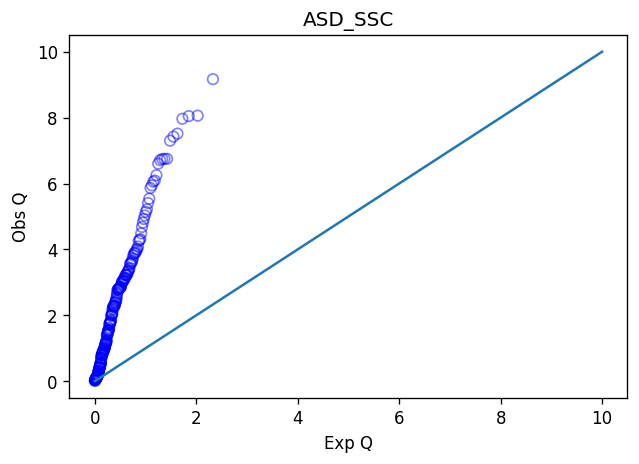

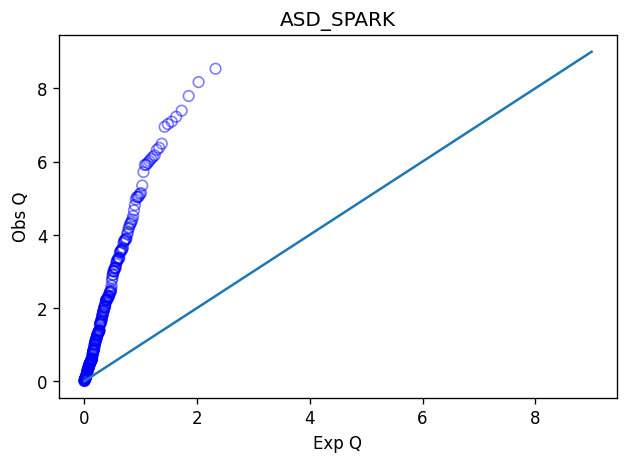

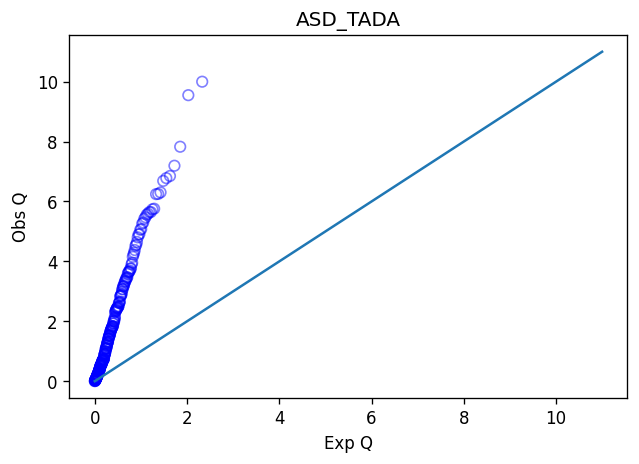

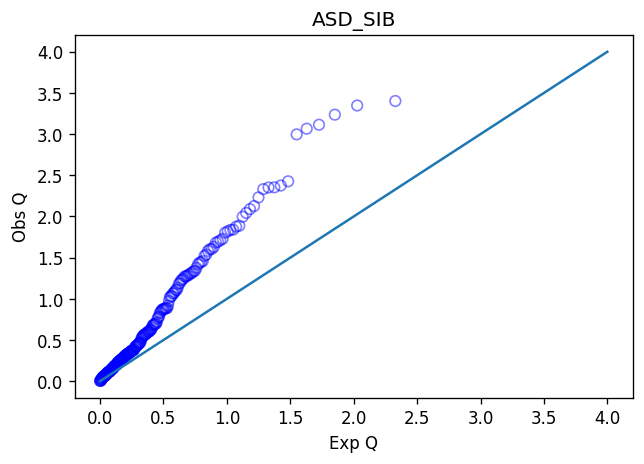

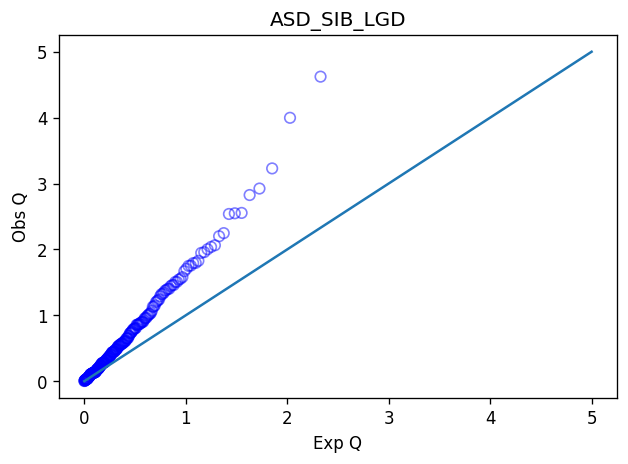

In [47]:
QQplot(bias_asd_ssc["P"].values, title="ASD_SSC")
QQplot(bias_asd_spark["P"].values, title="ASD_SPARK")
QQplot(bias_asd_tada["P"].values, title="ASD_TADA")
QQplot(bias_asd_sib["P"].values, title="ASD_SIB")
QQplot(bias_asd_sib_lgd["P"].values, title="ASD_SIB_LGD")

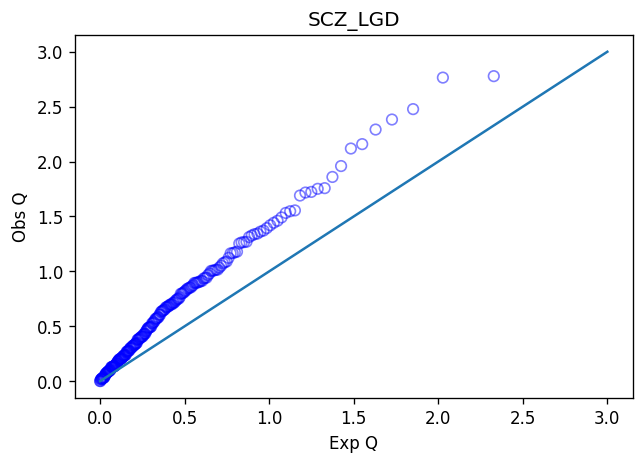

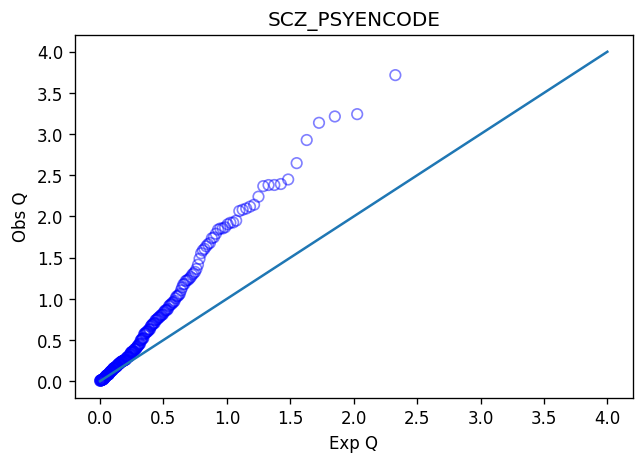

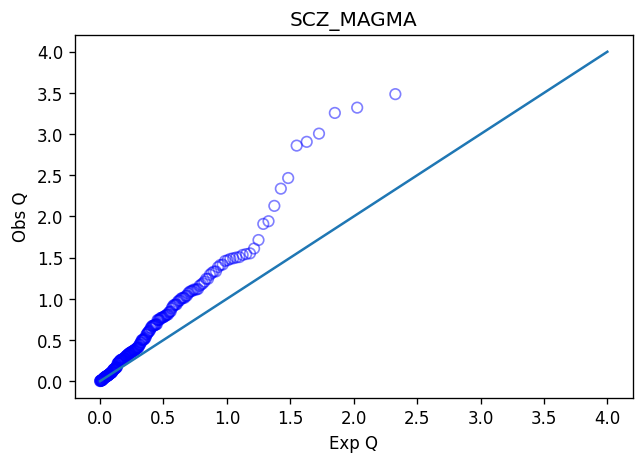

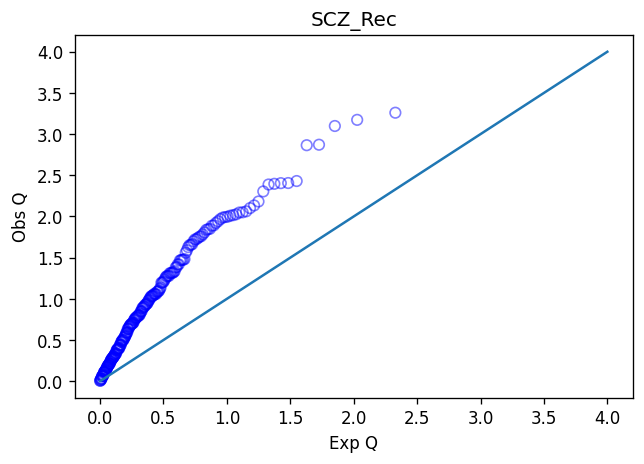

In [48]:
QQplot(bias_howrigan_lgd["P"].values, title="SCZ_LGD")
QQplot(bias_psyencode_gwas["P"].values, title="SCZ_PSYENCODE")
QQplot(bias_magma_gwas["P"].values, title="SCZ_MAGMA")
QQplot(bias_howrigan_rec["P"].values, title="SCZ_Rec")

In [51]:
scz_q, scz_z = QuantileAVGShowDist(ExpZscoreMat, howrigan_lgd)
print(len(howrigan_lgd))
rand = np.random.choice(brianspan, len(howrigan_lgd))
rand_q, rand_z = QuantileAVGShowDist(ExpZscoreMat, rand)

/Users/jiayao/Work/ASD_Circuits/src/ASD_Circuits.py:272: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  DZzscore = ZscoreMat[STR].loc[np.array(DZgenes)].values


61


In [84]:
import scipy.stats as stats

0.5650753850095647 0.5449787174867918 0.020096667522772838
1.0368760593357664
MannwhitneyuResult(statistic=1604.0, pvalue=0.40587425964349716)


Text(0.5, 1.0, 'quantiles of 25th str among scz and rand geneset')

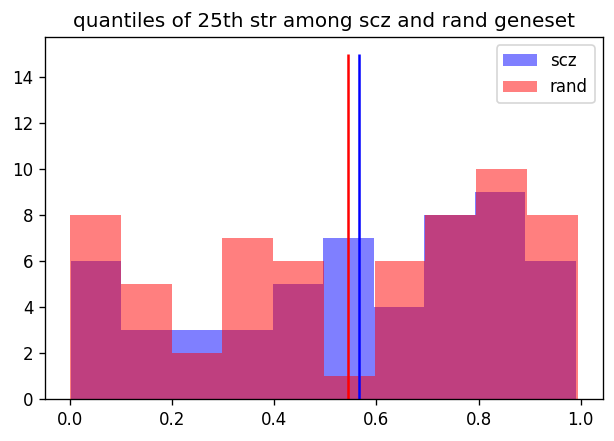

In [86]:
idx = 24
x1 = scz_q["Quantiles"].values[idx]
x2 = rand_q["Quantiles"].values[idx]
print(np.mean(x1), np.mean(x2), np.mean(x1) - np.mean(x2))
q1 = np.mean(x1); q2 = np.mean(x2)
print((q1-0) / (q2-0))
print(stats.mannwhitneyu(x1, x2))
plt.hist(x1, color="blue", alpha=0.5, bins=10, label="scz")
plt.hist(x2, color="red", alpha=0.5, bins=10, label="rand")
plt.vlines(x = np.mean(x1), ymin=0, ymax=15, color="blue")
plt.vlines(x = np.mean(x2), ymin=0, ymax=15, color="red")
plt.legend()
plt.title("quantiles of %dth str among scz and rand geneset"%(idx+1))

0.1977583387282991 0.14886900841312836 0.04888933031517073
1.328405024231083


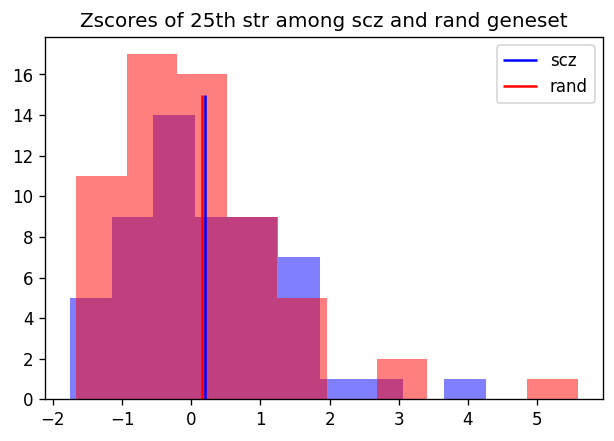

In [87]:
x1 = scz_z["Zscores"].values[idx]
x2 = rand_z["Zscores"].values[idx]
print(np.mean(x1), np.mean(x2), np.mean(x1) - np.mean(x2))
q1 = np.mean(x1); q2 = np.mean(x2)
print((q1-0) / (q2-0))
plt.hist(x1, color="blue", alpha=0.5, bins=10)
plt.hist(x2, color="red", alpha=0.5, bins=10)
plt.vlines(x = np.mean(x1), ymin=0, ymax=15, color="blue", label="scz")
plt.vlines(x = np.mean(x2), ymin=0, ymax=15, color="red", label="rand")
plt.title("Zscores of %dth str among scz and rand geneset"%(idx+1))
plt.legend()